# Importação da bibliotecas

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt

# EXCLUIR DEPOIS
from typing import Iterable

# Definição de constantes e variáveis globais

In [15]:
m = 500 # altura da imagem
n = 500 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Definição de funções

In [21]:
def tratar_imagem(caminho: str) -> np.ndarray :
    # Carrega a imagem em uma variável
    imagem = Image.open(caminho)
    # Redimensiona a imagem
    imagem = imagem.resize(DIMENSAO_IMAGEM)
    # Converte a imagem para escala de cinza
    imagem = imagem.convert('L')

    # Converte a imagem para um vetor
    imagem = np.array(imagem)
    # Torna o vetor unidmentsinal e o normaliza
    imagem = imagem.flatten() / 255

    return imagem


def exibir_imagem(vetor_imagem: np.ndarray) -> None :
    # Transforma o vetor unidmensional em uma matriz (m x n)
    imagem = np.resize(vetor_imagem, DIMENSAO_IMAGEM)
    
    plot = plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

    # TODO - DEBUG - EXCLUIR
    print(imagem.shape)
    
    return


def varrer_banco_imagens(caminho: str) -> np.ndarray :
    # Gera uma lista com os vetores das faces
    banco_imagens = []
    for arquivo in glob.glob(caminho):
        banco_imagens.append(tratar_imagem(arquivo))
        
    # Converte a lista para uma matriz (q x m*n), sendo 'q' a quantidade de imagens
    matriz_imagens = np.array(banco_imagens)
    
    return matriz_imagens

# Passo 1 (ALTERAR TITULO DEPOIS)

# Testes - 1

In [29]:
matriz_faces = varrer_banco_imagens('banco_imagens/*')

face_media = np.mean(matriz_faces, axis=0)
matriz_M = matriz_faces - face_media 

# Using full_matrices=False to avoid doing unnecessary calculations
_, _, eigenfaces = np.linalg.svd(matriz_M, full_matrices=False)

(30, 250000)


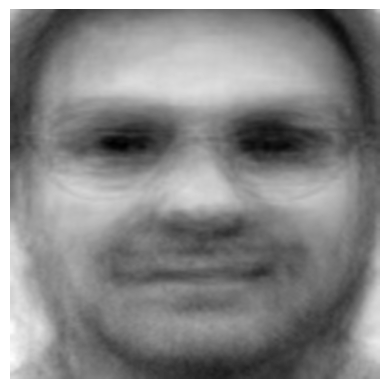

(500, 500)


In [30]:
exibir_imagem(face_media)

(30, 250000)


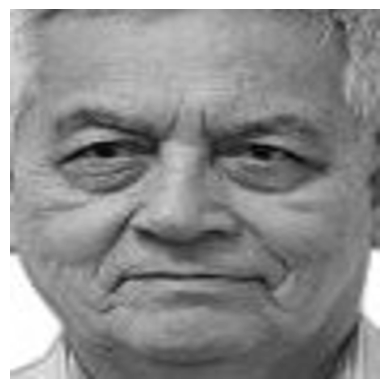

(500, 500)


In [36]:
print(matriz_faces.shape)
exibir_imagem(matriz_faces[17])